In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
import sys

platform = sys.platform
recur_limit = sys.getrecursionlimit()
print("The recursion limit for %s platform is %s" % (platform, recur_limit))

sys.setrecursionlimit(10000)
new_recur_limit = sys.getrecursionlimit()
print("The new recursion limit for %s platform is %s" % (platform, new_recur_limit))

The recursion limit for darwin platform is 1000000
The new recursion limit for darwin platform is 10000


In [149]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.data = np.random.rand(self.height, self.width)
        self.p = p
        self.clusters = []
        self.visited = set()

        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    

    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                # clears the data and all of the arrays that have to do with the data
                self.data[i][j] = 0
        self.clusters = []
        self.visited.clear()
                
    def random_populate(self, new_p):
        self.clear()
        self.data = np.random.rand(self.height, self.width)
        for i in range(0, self.height):
            for j in range(0, self.width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= new_p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
        return self
    
    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        if spanning != []:
            for i in range(self.height):
                for j in range(self.width):
                    if (i, j) in spanning[0]:
                        span_data[i][j] = -1
            plt.imshow(span_data, cmap='gray')
            plt.show()
        return ""

    def get_clusters(self):
        """From a lattice, returns the number of clusters, the list of clusters and the tuples for each cell that
        makes up the cluster, and any spanning cluster. """
        
        span_clusters = []
        
        # find all clusters, double counting is ok
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1 and (i, j) not in self.visited:
                    cluster = self.finish_cluster(i,j)
                    self.clusters.append(cluster)

        # assume we are always doing squares
        for cluster in self.clusters:
            if len(cluster) >= self.height and cluster not in span_clusters:
                for cell in cluster:
                    # if the cluster has a cell at row = 0 and col = 0
                    if cell[0] == 0 and cell[1] == 0:
                        for second_cell in cluster:
                            if (second_cell[0] == self.width - 1) or (second_cell[1] == self.height - 1):
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                        
                    # if the cluster has a cell at col = 0
                    if cell[0] == 0:
                        for second_cell in cluster:
                            if second_cell[0] == self.width - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                
                                
                    # if the cluster has a cell at row = 0
                    if cell[1] == 0:
                        for second_cell in cluster:
                            if second_cell[1] == self.height - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                


        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, span_clusters
    
    
#     def finish_cluster(self, i, j):
#         """Helper function to get_clusters. finish_cluster is a recursive function that returns all adjacent
#         cells to a given cell that read 1. Returns a list """
    def finish_cluster(self, i, j):
        """Helper function to get_clusters. finish_cluster is a recursive function that returns all adjacent
        cells to a given cell that read 1. Returns a list """
        returnList = []
        stack = [(i, j)]
        while stack: 
            # print(1)
            # print(f"Stack Before: {stack}")
            node = stack.pop(0)
            r = node[0]
            c = node[1]
            if not (0 <= r < self.height and 0 <= c < self.width):
                continue
            if self.data[r][c] != 1 or (r, c) in self.visited:
                continue
            
            self.visited.add((r, c))
            returnList.append(node)
            directions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
            for dr, dc in directions:
                newRow = r + dr
                newCol = c + dc
                stack.append((newRow, newCol))
            # print(f"Stack After: {stack}")
        
        return returnList
            
            
        # self.visited.add((i, j))
        # res = [(i, j)]
        # res += self.finish_cluster(i-1, j)
        # res += self.finish_cluster(i+1, j)
        # res += (self.finish_cluster(i, j+1))
        # res += (self.finish_cluster(i,j-1))
        # return res 
"""
How does finish cluster work. So base case is if it is out of bounds then we return nothing
or the cell equals 0 then we return nothing or it is already in visited. If it is a 1 and
it is in bounds then we add it to visited so we don't go over it again. If either of the base
cases occur the cluster will have nothing added to it. THe recursion ends when we have gone 
through all the 1's in the cluster cause it ends at a 0 or at the end of the 2d array. We
never start at a 0 because we check.
"""





"\nHow does finish cluster work. So base case is if it is out of bounds then we return nothing\nor the cell equals 0 then we return nothing or it is already in visited. If it is a 1 and\nit is in bounds then we add it to visited so we don't go over it again. If either of the base\ncases occur the cluster will have nothing added to it. THe recursion ends when we have gone \nthrough all the 1's in the cluster cause it ends at a 0 or at the end of the 2d array. We\nnever start at a 0 because we check.\n"

In [150]:
lattice = Lattice(1000,1000,0.6)

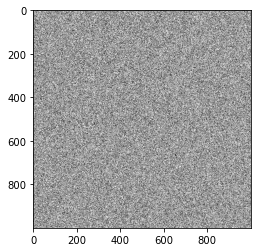

In [151]:
print(lattice)
# lattice.color_spanning_cluster()

In [152]:
# lattice.finish_cluster(1, 0)

In [153]:
num_clusters, clusters, spanning = lattice.get_clusters()

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
start_p = 0
num_p = 100
plist = np.linspace(0,0.8,num_p)
test_lattice = Lattice(100,100,0)
num_iters = 100
pc_freq = []
span_count = 0

# for each p, repopulate num_iters lattices and count the ones with spanning clusters
for p in plist:
    span_count = 0
    for i in range(num_iters):
        curr_lattice = test_lattice.random_populate(p)
        num_clusters, clusters, spanning = curr_lattice.get_clusters()
        if len(spanning) > 0:
            span_count += 1
    pc_freq.append(span_count)

pc = sum([plist[i]*pc_freq[i] for i in range(num_p)])/sum(pc_freq)  
print(f"pc is {pc}")
# print(plist,pc_freq)
# fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
# # We can set the number of bins with the *bins* keyword argument.
# axs.hist(pc_freq, bins=num_p, density=True)